**PPOJECT DESCRIPTION**

__You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.__


You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

**Description of the data**

 • Hypotheses — brief descriptions of the hypotheses
  
 • Reach — user reach, on a scale of one to ten
  
 • Impact — impact on users, on a scale of one to ten
  
 • Confidence — confidence in the hypothesis, on a scale of one to ten
  
 • Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more      resource-intensive the test.

# # Step 1. Loading the data and having an initial look at it:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from scipy import stats as st
import math as mth
import datetime as dt


In [3]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

display(hypotheses, orders.head(), visits.head())
display(orders.tail(), visits.tail())
display(hypotheses.info(), orders.info(), visits.info())
display(hypotheses.describe(), orders.describe() , visits.describe())




,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

None

None

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



•	There aren't missing rows in datasets.

•	There are several columns in which I need to convert data to data type. This can help us  to optimize data size as well.

•	No negative or other obscure meanings.

• There is a large difference between min and max revenue values in orders dataframe. We will check it later.


•	There are several columns name with capital letters. I will convert  all data to small letters. This will help us to avoid unnecessary errors in the code.

In [4]:
#making column names lowercase to make them the same.
hypotheses.columns = hypotheses.columns.str.lower()
orders.columns = orders.columns.str.lower()
visits.columns = visits.columns.str.lower()

In [5]:
#cheking for duplicates
display(hypotheses.duplicated().sum(), orders.duplicated().sum(), visits.duplicated().sum())


0

0

0

There aren't duplicated rows in datasets.



# #EXPLORING DATA SETS INDIVIDUALLY 


# visits dataframe

In [6]:
#analyzing the data with the info() method.

visits.info(memory_usage='deep') 

#changing data type:
visits['date'] =  pd.to_datetime(visits['date'])

#checking the data size after optimization part
visits.info(memory_usage='deep') 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB



- In order to find the exact size of the data, add the parameter memory_usage='deep'.


- We can see that the data is divided into 3 columns:

date — object 

group — object

visits— integer


- We can also see that the size of the downloaded data is 8.2KB. 


- The column date contains the date.By using he to_datetime() method I convert the object type to date


- We can also see that the size of the  data after changing is smaller than original size. Now the size is 4.6KB. 

(We could also turn object data in group columns to category, but our further work doesn't allow us to use category dtype).

In [10]:
#Checking the number of visits in each A/B test groups
a_visits = visits.query('group == "A"').visits.sum()
b_visits = visits.query('group == "B"').visits.sum()
print('Number of visits for A group =', a_visits)
print('Number of visits for B group =', b_visits)


Number of visits for A group = 18736
Number of visits for B group = 18916


The data is almost equally splitted.

In [11]:
#Checking min and max period time:
print('First visit - ', visits.date.min())
print('Last visit  - ', visits.date.max())


First visit -  2019-08-01 00:00:00
Last visit  -  2019-08-31 00:00:00


# orders dataframe

In [12]:
orders.info(memory_usage='deep') #174
orders['group'].value_counts()
orders['date'] =  pd.to_datetime(orders['date'])
orders.info(memory_usage='deep') #106

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


- In order to find the exact size of the data, add the parameter memory_usage='deep'.


- We can see that the data is divided into 5 columns:

transactionid  — integer 

visitorid — integer

date — object

revenue - integer

group - object

- We can also see that the size of the downloaded data is 174.3KB. 


- The column date contains the date.By using he to_datetime() method I convert the object type to date


- We can also see that the size of the  data after changing is smaller than original size. Now the size is 105.3KB. 

(We could also turn object data in group columns to category, but our further work doesn't allow us to use category dtype.)

In [13]:
#Checking the number of orders and buyers
number_of_orders = orders.transactionid.count()
number_of_buyers = orders.visitorid.nunique()
print('Number of orders = ', number_of_orders)
print('Number of buyers = ', number_of_buyers)

Number of orders =  1197
Number of buyers =  1031


In [14]:
#Checkoing the min and max period time
print('First order - ', orders.date.min())
print('Last order - ', orders.date.max())


First order -  2019-08-01 00:00:00
Last order -  2019-08-31 00:00:00


It means visits data comply with the orders data.

In [15]:
#Checking the groups values
orders.group.value_counts()


B    640
A    557
Name: group, dtype: int64

group B made 15% more orders than A

In [16]:
#checking if we have the same visitors in both groups.
A_visitors = orders.query('group == "A"').visitorid.unique()
B_visitors = orders.query('group == "B"').visitorid.unique()

same_buyers = orders.query('visitorid in @A_visitors and visitorid in @B_visitors')
same_buyers['visitorid'].nunique()


58

There are 58 identical visitors in both groups.

In [17]:
#droping these visitors in order to avoid mistakes.
orders = orders.drop(same_buyers.index, axis=0)

In [18]:
#Checking the number of orders for each A/B test group in filtered data
A_orders = orders.query('group == "A"').transactionid.count()
B_orders = orders.query('group == "B"').transactionid.count()
print('Number of A group orders =',A_orders)
print('Number of B group orders =',B_orders)


Number of A group orders = 468
Number of B group orders = 548


Group B made 16% more orders than A

In [19]:
#Checking the number of buyers for each A/B test group in filtered data
A_visitors = orders.query('group == "A"').visitorid.nunique()
B_visitors = orders.query('group == "B"').visitorid.nunique()
print('Number of A group visits =',A_visitors)
print('Number of B group visits =',B_visitors)


Number of A group visits = 445
Number of B group visits = 528


We got different sample sizes. I will use the Random sample() method in order to generate a random samples of the equal size.

# Part 1. Prioritizing Hypotheses


# Applying the ICE framework to prioritize hypotheses.

In [20]:
#checking all hypotheses provided in the table
hypotheses.hypothesis.unique()

array(['Add two new channels for attracting traffic. This will bring 30% more users',
       'Launch your own delivery service. This will shorten delivery time',
       "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
       'Change the category structure. This will increase conversion since users will find the products they want more quickly',
       'Change the background color on the main page. This will increase user engagement',
       'Add a customer review page. This will increase the number of orders',
       'Show banners with current offers and sales on the main page. This will boost conversion',
       'Add a subscription form to all the main pages. This will help you compile a mailing list',
       'Launch a promotion that gives users discounts on their birthdays'],
      dtype=object)

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


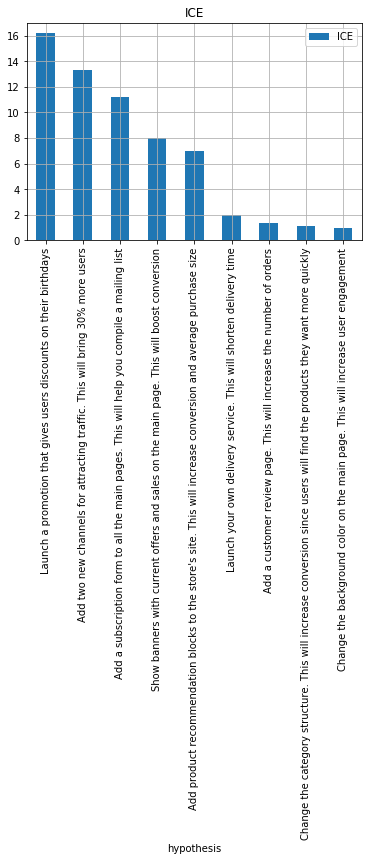

In [21]:
#creating an additional column with the results of ICE framework


hypotheses['ICE'] = hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']
ICE=hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
print(ICE)
ICE.plot(x='hypothesis',y='ICE', kind='bar',grid=True ,title='ICE')





According to the "ICE" parameter, the most promissing hypotheses are:

- 8-'Launch your own delivery service. This will shorten delivery time',

- 0-'Add two new channels for attracting traffic. This will bring 30% more users',

- 7-'Add a subscription form to all the main pages. This will help you compile a mailing list'.



# Applying the RICE framework to prioritize hypotheses. 

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


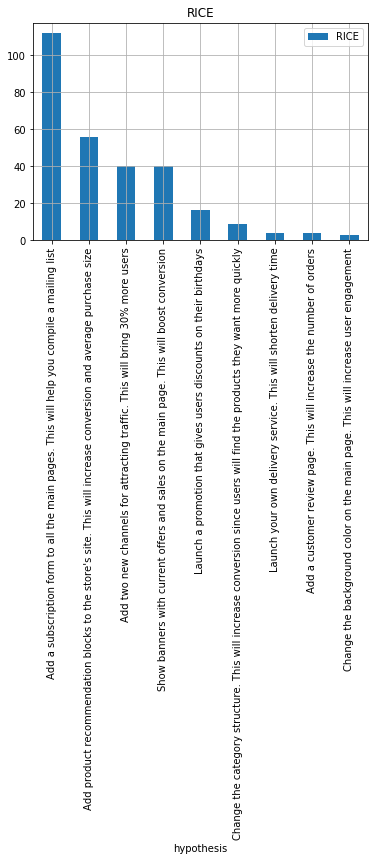

In [22]:
#creating an additional column with the results of RICE framework

hypotheses['RICE'] = hypotheses['impact']*hypotheses['confidence']*hypotheses['reach']/hypotheses['effort']
RICE=hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
print(RICE)
RICE.plot(x='hypothesis',y='RICE', kind='bar',grid=True ,title='RICE')




The RICE method is helpful if it’s important to understand how many of out customers a given feature will benefit.

According to the "RICE" parameter, the most promissing hypotheses are:
- 7-'Add a subscription form to all the main pages. This will help you compile a mailing list',

- 2-'Add product recommendation blocks to the store's site. This will increase conversion and average purchase size',

- 0 and 6 have the same score -'Add two new channels for attracting traffic. This will bring 30% more users',       'Show banners with current offers and sales on the main page. This will boost conversion',





# Showing how the prioritization of hypotheses changes when you use RICE instead of ICE

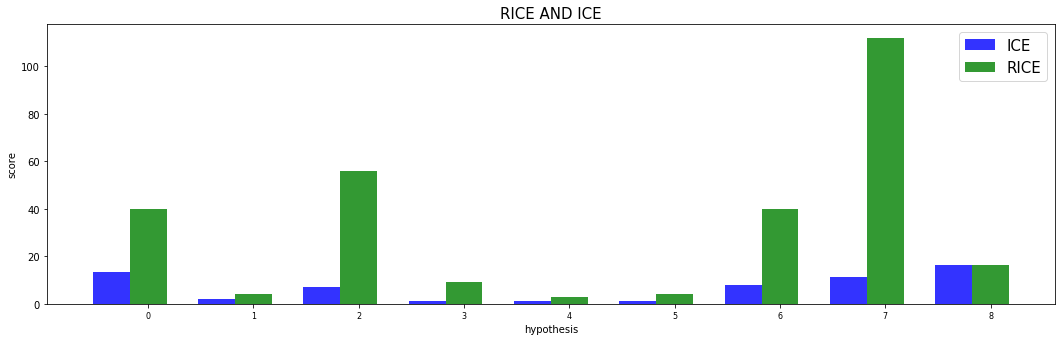

In [23]:
ICE = hypotheses['ICE'].tolist()
Hypothesis = hypotheses['hypothesis'].tolist()
RICE = hypotheses['RICE'].tolist()

n_Hypothesis = len(Hypothesis)
fig, ax = plt.subplots()
index = np.arange(n_Hypothesis)
bar_width = 0.35
opacity = 0.8
fig.set_figheight(5)
fig.set_figwidth(15)
plt.tick_params(axis="y", labelsize=10)
plt.tick_params(axis="x", labelsize = 8)

rects1= plt.bar(index, ICE, bar_width,      
         
                          
alpha=opacity,
color='b',
label='ICE')

rects2 = plt.bar(index + bar_width, RICE, bar_width,
alpha=opacity,
color='g',
label='RICE')

plt.title('RICE AND ICE', fontsize=15)
plt.xticks(index+bar_width,(
'0',
'1',
'2',
'3',
'4',
'5',
'6',
'7',
'8'))

plt.rcParams.update({'font.size':15})
plt.xlabel('hypothesis')
plt.ylabel('score')

plt.legend()

plt.tight_layout()
plt.show()





ICE score = (Impact x Confidence) / Effort

RICE score = (Reach x Impact x Confidence)/ Effort 

- Reach — how many users will be affected by the update you want to introduce
- Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product
- Confidence — how sure you are that your product will affect them in this way
- Effort — how much will it cost to test the hypothesis

*So the higher the score of the "reach" parameter, the greater the difference between the two scores "RICE" and "ICE".*

- Hypotheses 7('Add a subscription form to all the main pages. This will help you compile a mailing list') and 0('Add two new channels for attracting traffic. This will bring 30% more users').

- Hypotheses 7 has:
the highest reach, which means that many users will be affected by the update,
high impact is means that changes will strongly affect the users,
medium effort score (cost),
strong confidence.

- Hypotheses 0 has::
lower reach,
higher effect and costs.

*We can choose one of these hypotheses based on our goals and budget.*


# Part 2. A/B Test Analysis


# Cumulative revenue by group. 

In [24]:
# building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates() 
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


In [25]:
# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [26]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


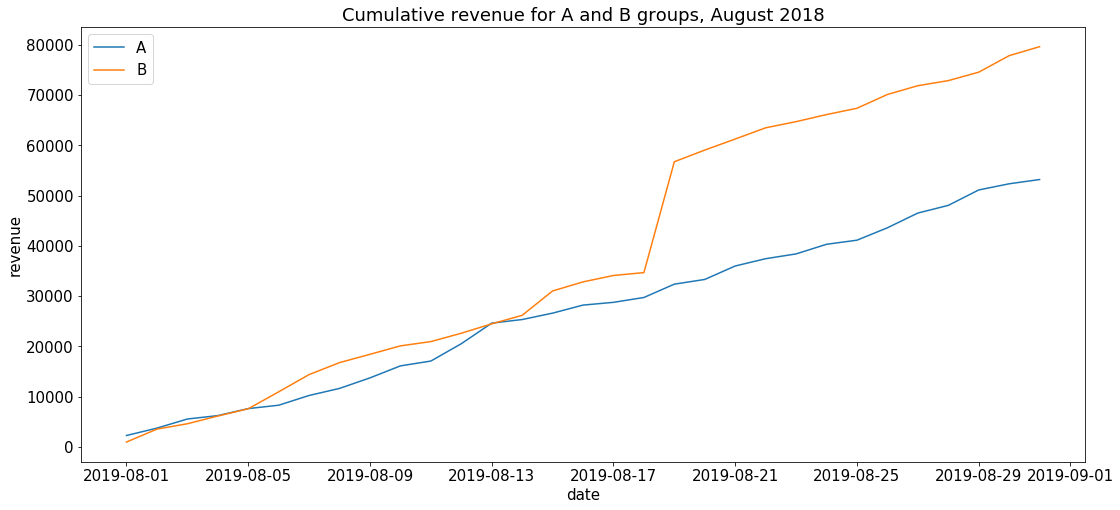

In [27]:
#Ploting cumulative revenue graphs by day and A/B test group:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.figure(figsize=(18,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Cumulative revenue for A and B groups, August 2018')
plt.xlabel('date')
plt.ylabel('revenue')

plt.show()




Revenue is rising steadily throughout the whole test. That's a good sign.


However, we see Group A revenues are higher than Group B and more balanced. In Group B we see a lot of indistinct shifts and jumps.

This means a sharp increase in the number of orders, or the presence of very expensive orders in the sample.





# Cumulative average order size by group. 

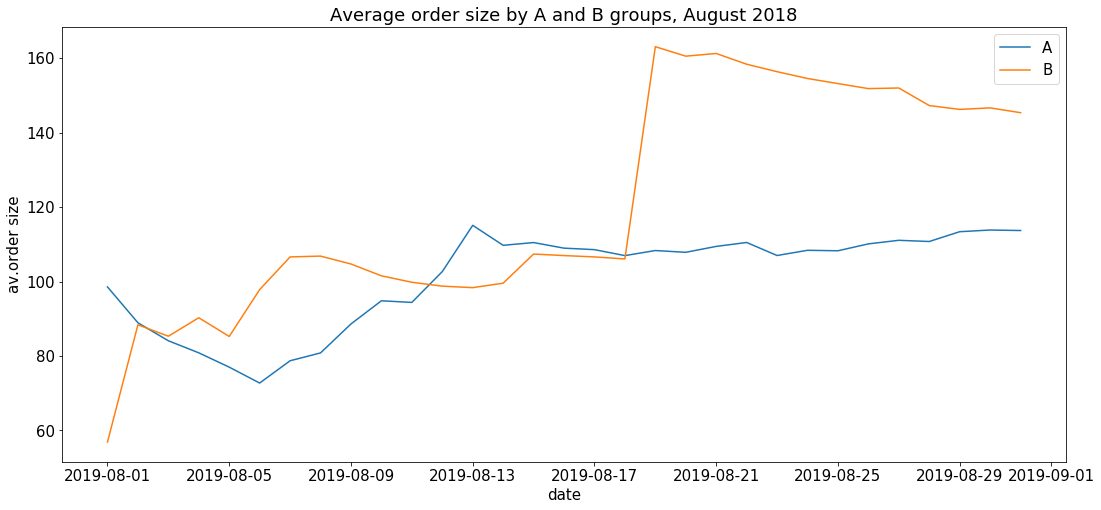

In [28]:
#Ploting average purchase size by group. We'll divide cumulative revenue by the cumulative number of orders:
plt.figure(figsize=(18,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Average order size by A and B groups, August 2018')
plt.xlabel('date')
plt.ylabel('av.order size')

plt.show()

The average purchase size of Group B is almost always lower than the average purchase size of Group A, except for a few days in the middle of the month.

For Group A, the average purchase size is balanced and remains virtually unchanged throughout the graph.
For Group B around 17, there was a strong jump in the average purchase size level, which lasted several days and then began to decline gradually.There are currently anomalies in this area.


# Relative difference in cumulative average order size for group A/B groups. 

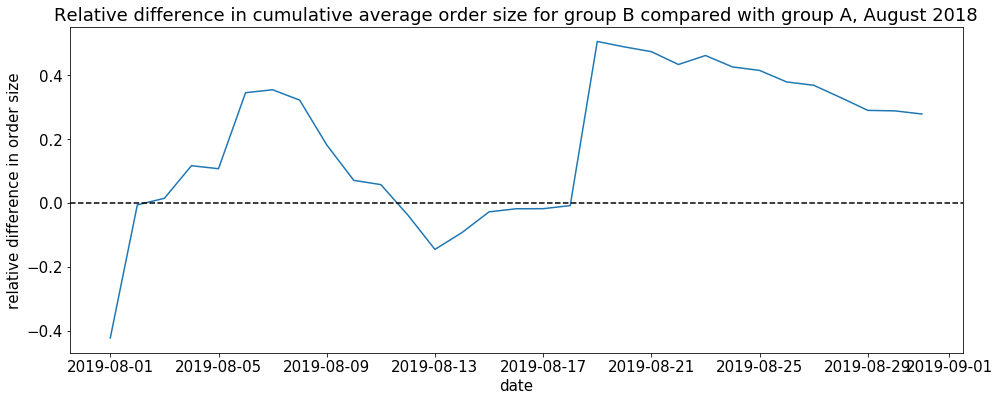

In [29]:
#Plot a relative difference graph for the average purchase sizes.
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(16,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Relative difference in cumulative average order size for group B compared with group A, August 2018')

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('date')
plt.ylabel('relative difference in order size')

plt.show()

At several points the difference between the segments spikes. This means there must be some big orders and outliers.the graph keeps going lower at the end.

# Calculating each group's conversion rate.

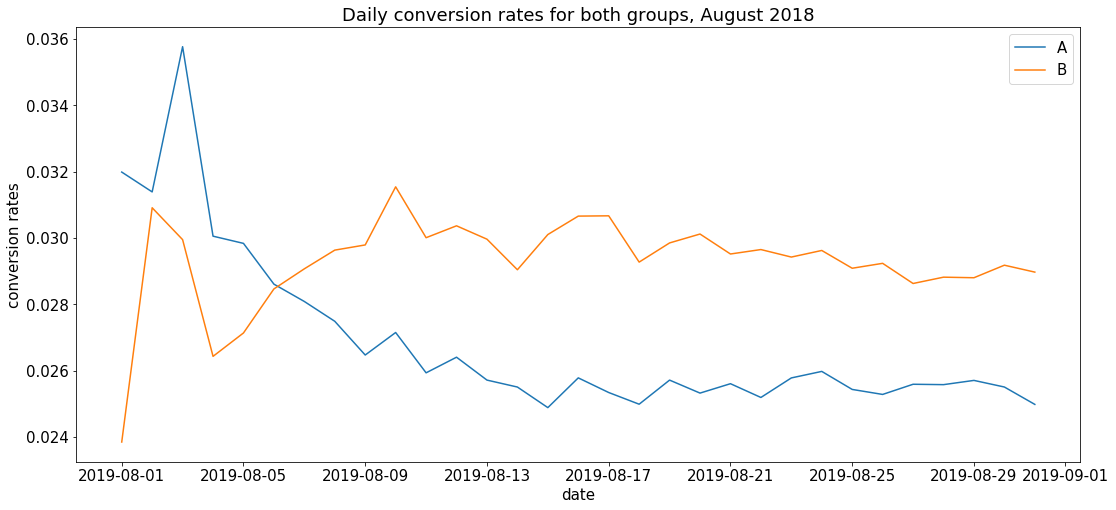

In [30]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(18,8))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.legend()
plt.title('Daily conversion rates for both groups, August 2018')
plt.xlabel('date')
plt.ylabel('conversion rates')

plt.show()

Group A conversion is higher than Group B conversion.

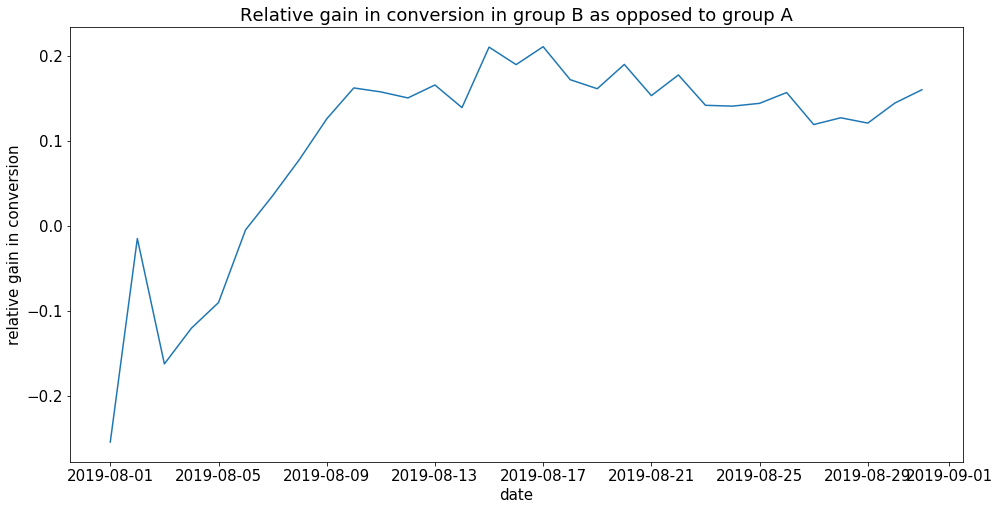

In [28]:
#Ploting a relative difference graph for the cumulative conversion rates:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.title('Relative gain in conversion in group B as opposed to group A')
plt.xlabel('date')
plt.ylabel('relative gain in conversion')


plt.show()

Initially, the conversion ratio between the two groups grows. This can be in two cases:
1. Conversion of group B grows much faster than conversion of group A.
2. The conversion of group A is significantly reduced compared to the conversion of group B.

In any case, at the beginning of the test, we see strong jumps, and this may be due to anomalies.

After the 10th, we see the stabilization of the conversion ratios of both groups.

# Scatter chart of the number of orders per user. 

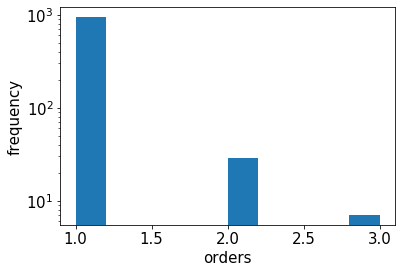

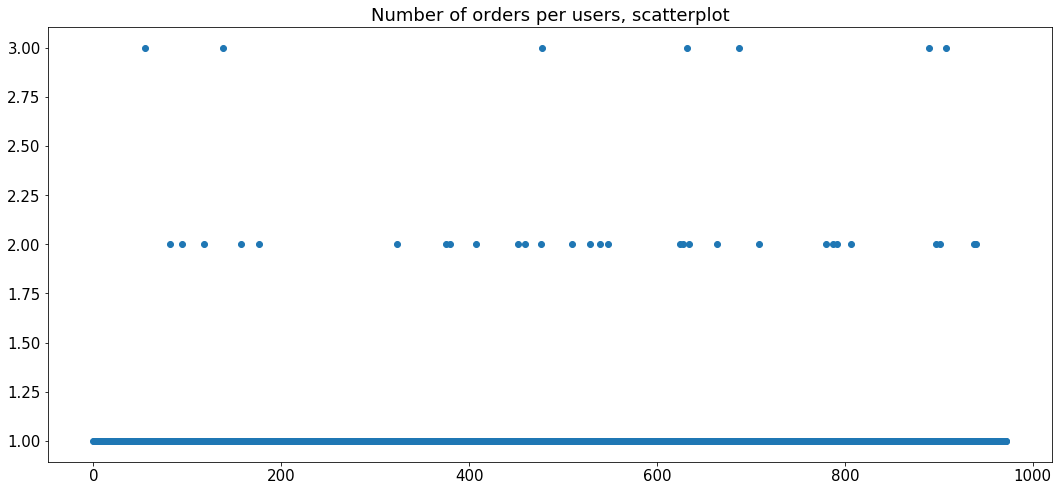

In [31]:
#finding the number of orders per user and print the result

ordersByUsers= orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['userid','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

#checking the distribution of orders

plt.hist(ordersByUsers['orders'], log=True) 
plt.xlabel('orders')
plt.ylabel('frequency')



#plotting scatter chart

plt.figure(figsize=(18,8))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Number of orders per users, scatterplot')

plt.show()






There are very few users with more than two orders. These cases may as well turn out to be anomalies. There are a lot of users with 1 order. But also there are some users with 2 orders. 

# Calculating the 95th and 99th percentiles for the number of orders per user. 

In [32]:
print(np.percentile(ordersByUsers['orders'], [ 95, 99])) 

[1. 2.]


Not more than 5% of users placed more than 1 order, and only 1% of users made 2 or more orders. It would be reasonable to set 1 order per user as the limit for the number of orders and to filter anomalies on that basis. 

# Ploting a scatter chart of order prices.


      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A
949      1347999392   887908475 2019-08-21    930.0     A
940      2420050534  4003628586 2019-08-08    905.8     B
613      4071177889  3931967268 2019-08-07    830.3     B


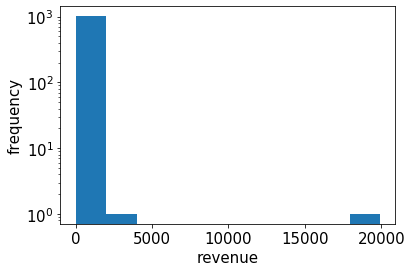

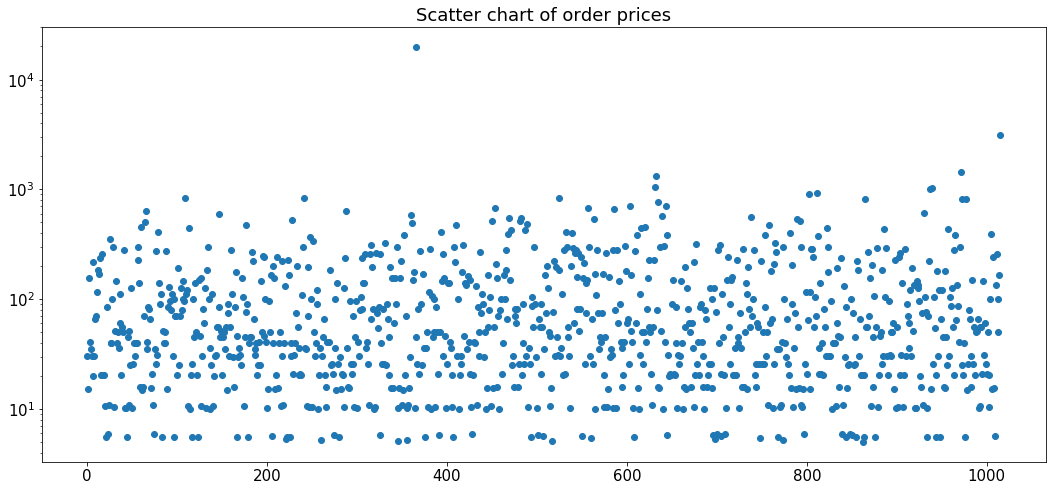

In [33]:
#sorting the revenue 
print(orders.sort_values(by='revenue',ascending=False).head(10))

data = orders.sort_values(by='revenue',ascending=False)
#checking the distribution of orders
plt.hist(orders['revenue'], log=True) 
plt.xlabel('revenue')
plt.ylabel('frequency')





#ploting a scatter chart 

plt.figure(figsize=(18,8))
ax = plt.gca()

x_values = pd.Series(range(0,len(orders['revenue'])))
ax.scatter(x_values, orders['revenue']) 
plt.title('Scatter chart of order prices')
ax.set_yscale('log')
plt.show()




Almost all orders are within $ 900.

# Calculating the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [34]:
print(np.percentile(orders['revenue'], [ 95, 99])) 

[414.275 830.3  ]


Not more than 5% of users placed orders that cost more than 435,54$.Not more than 1% placed orders more expensive than 830.30$.
It would be reasonable to set 435,54$ as the limit for the order prices and to filter anomalies on that basis.

# Statistical significance of the difference in conversion between the groups using the raw data.

In [35]:
#creating the variables ordersByUsersA and ordersByUsersB,where the number of orders for users with at least one order will be specified.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

In [36]:
#declaring the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. 
#We use the np.arange() function to create a list of indices
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [35]:
alpha = .05 # significance level

results = st.shapiro(sampleA)
p_value = results[1] # the second value in the array of results (with index 1) - the p-value

print('p-value: ', p_value)

if (p_value < alpha):
    print("Null hypothesis rejected: the distribution is not normal")
else:
    print("Failed to reject the null hypothesis: the distribution seems to be normal") 

p-value:  0.0
Null hypothesis rejected: the distribution is not normal


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



In [36]:
alpha = .05 # significance level

results = st.shapiro(sampleB)
p_value = results[1] # the second value in the array of results (with index 1) - the p-value

print('p-value: ', p_value)

if (p_value < alpha):
    print("Null hypothesis rejected: the distribution is not normal")
else:
    print("Failed to reject the null hypothesis: the distribution seems to be normal") 

p-value:  0.0
Null hypothesis rejected: the distribution is not normal


Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test.

In [37]:
print('p-value for raw data =', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('The relative difference in conversion between the groups for raw data = ', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


p-value for raw data = 0.00551
The relative difference in conversion between the groups for raw data =  0.160


I apply the criterion and format the p-value by rounding it to 5 decimal places.
SampleA stores a sample where each element is the number of orders made by a certain user, including zeroes. So the number of sampleA elements is the number of users, and the sum of all the elements is the number of orders. To get the group's conversion rate, I need to divide the sum of the orders by the number of users. Using the mean() method, I find the mean for sampleA. I find the conversion rate for group B in a similar way: sampleB.mean().


We use mannwhitneyu() method because our data contains big (compared to the normal distribution) outliers and algebraic metrics don't work very well. 
Nonparametric methods are useful because they do not make assumptions about how the data is distributed (so you don't have to estimate the distribution's parameters). Such methods are often used when it's difficult (or even impossible) to estimate parameters because of a large number of outliers.



The p-value is smaller than 0.05,  So we reject the null hypothesis that there isn't a statistically significant difference in conversion between the groups. The relative difference of group B is 16% (the second row of the output).It is still raw data with outliers.

**Conclusion: based on the raw data, there is a difference in conversion between groups A and B.**



# Statistical significance of the difference in average order size between the groups using the raw data.

In [38]:
print('p-value for raw data =', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('The relative difference in average order size between the groups for raw data = ', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value for raw data = 0.431
The relative difference in average order size between the groups for raw data =  0.278


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is much bigger than it is for group A

**Conclusion: based on the raw data, there's not a statistically significant difference in conversion between the groups A and B.**



# Statistical significance of the difference in conversion between the groups using the filtered data.

In [39]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 433]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)



1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitorid, dtype: int64
(68,)


I define anomalous users as those who place more than 2 orders or one order bigger than $433. Thus I remove the 5% of users with the largest numbers of orders and  5% of the users with the most expensive orders. 

We have 50 anomalous users in total.

In [40]:
#calculating the statistical significance of the differences in conversion between the groupsin filtered data

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [41]:
#applying the statistical Mann-Whitney criterion to the resulting samples:
print('p-value for filtered data =', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('The relative difference in conversion between the groups for filtered data = ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value for filtered data = 0.001
The relative difference in conversion between the groups for filtered data =  0.256


The results for conversion almost didn't change.


# Making decision based on the test results

In [42]:
print('p-value for filtered data =', "{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('The relative difference in average order size between the groups for filtered data = ', "{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value for filtered data = 0.458
The relative difference in average order size between the groups for filtered data =  -0.021


The p-value decreased, but still greater than 0.05. Now the difference between the segments is -19% instead of 12%!
Seems that without the part of data with outliers, group B lost all the advantages on this part.




- Neither raw nor filtered data revealed any statistically significant differences in conversion between the groups.
- Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
- The graph showing the difference in conversion between the groups tells us that group B results are better.
- The graph showing the difference in average order size between the groups tells us that even if group B results are better than group A', they are not stable, and  decreacing at the end , as shown by the filtered data, are the result of outliers.

**Based on these facts, 2 conclusions can be drawn:**

1. If the goal is to increase conversion, then we can conclude that the test was successful and there is a high probability that segment B will be better than segment A.

2. If the goal is to increase the average order size, then we can conclude that the test is unsuccessful and should be stopped. There's no use continuing it, since the probability that segment B will turn out to be better than segment A is almost nonexistent.